# Exploratory Data Analysis (EDA) for the King County, WA, Houses Dataset

In [ ]:
#import warnings

#warnings.filterwarnings("ignore")

#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns


#from matplotlib.ticker import PercentFormatter
#plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
#plt.rcParams["figure.facecolor"]= "w"
#pd.plotting.register_matplotlib_converters()
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

## 1 - Preparations

We first import the libraries required to load and manipulate the dataset.

In [1]:
import pandas as pd #used to load and manipulate the dataset
import numpy as np
import matplotlib.pyplot as plt #used to make plots from the dataset
import math #for mathematical functions

Using *Pandas*, we can now load the *.csv* file containing the **King County Houses Dataset** into a dataframe.

In [2]:
kc_houses_df = pd.read_csv('data/eda.csv')
kc_houses_df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0


In [3]:
kc_houses_df.tail()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date,price
21592,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,...,0.0,2009,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0
21593,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,...,0.0,2014,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0
21594,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,...,0.0,2009,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0
21595,291310100,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,8,...,0.0,2004,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0
21596,1523300157,2.0,0.75,1020.0,1076.0,2.0,0.0,0.0,3,7,...,0.0,2008,0.0,98144,47.5941,-122.299,1020.0,1357.0,2014-10-15,325000.0


... and here it's the dataset!

Let us first check if the columns's names are in the right format (no spaces and all lowercases).

In [4]:
kc_houses_df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sale_date', 'price'],
      dtype='object')

The columns names seems to be just fine. :-)

It's also good to check if there are any duplicate rows in the dataset.

In [5]:
kc_houses_df.duplicated().value_counts()

False    21597
Name: count, dtype: int64

Great, no duplicated rows!

Next, we check the type of each column.

In [6]:
kc_houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [7]:
kc_houses_df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19206.000000,21534.000000,21597.000000,21597.000000,21597.000000,21145.000000,21597.000000,17749.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007602,0.233863,3.409825,7.657915,1788.596842,291.857224,1970.999676,836.650516,98077.951845,47.560093,-122.213983,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086858,0.765686,0.650546,1.173200,827.759761,442.490863,29.375234,4000.110554,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,20150.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


At this point we can see some inconsistencies.

- The sale_date, yr_built and yr_renovated are float and perhaps could be converted to the date type.
- The yr_renovated column has a max of 20150, so it seems the years have been multiplied by a factor 10.
- The bedrooms column should be of the int type, rather than float.
- The view column should be of int type, as it refers to the times the house was viewed by a potential buyer.
- The waterfront column should be of the boolean type.
- We also have several null values in waterfront, view, sqft_basement and yr_renovated that we might have to deal with later.

## 2 - Fixing the data formats

### 2.1 - Fixing the date columns

We first change the data type of sale_date to the datetime type.

In [8]:
kc_houses_df['sale_date'] = pd.to_datetime(kc_houses_df['sale_date'], format='%Y-%m-%d') #take the cell in the given format and transform to the datetime type
kc_houses_df[['sale_date']].dtypes #display the data type of the column

sale_date    datetime64[ns]
dtype: object

We check if the yr_renovated column has NaN values, as we can't change their type.

In [9]:
kc_houses_df['yr_renovated'].isna().sum() #check if a cell is NaN and count the number of True occurences

3848

... and indeed, 3848 of them! We will *assume* that the NaN values in this case correspond to the house not have been renovated yet, and thus assign the value 0. 

In [10]:
kc_houses_df['yr_renovated'] = kc_houses_df['yr_renovated'].fillna(0) #change all NaN cells to 0
kc_houses_df['yr_renovated'].isna().sum() #we check if all the NaN changed to 0

0

Now we can change the type. We will choose *int*, as we only have the year. 

In [11]:
kc_houses_df['yr_renovated'] = kc_houses_df['yr_renovated'].astype('int64') #change the data type of the column to int64
kc_houses_df['yr_renovated'].dtypes

dtype('int64')

... so the years are still not in the right format.

The column yr_renovated has another problem: all years are multiplied by a factor 10. Indeed, there are no renovated houses *before* 2015

In [12]:
kc_houses_df[(kc_houses_df['yr_renovated'] < 2016) & (kc_houses_df['yr_renovated'] > 0)]['yr_renovated'].count() #screen by the houses renovated before 2015 and count

0

... but there are no houses renovated after 2015 once we factor out the factor 10

In [13]:
kc_houses_df[(kc_houses_df['yr_renovated']/10 > 2016)]['yr_renovated'].count() #screen by the houses renovated after 2015 now taking into account the factor 10 and count

0

This can be corrected as follows

In [14]:
kc_houses_df['yr_renovated'] = kc_houses_df['yr_renovated']/10
kc_houses_df['yr_renovated'] = kc_houses_df['yr_renovated'].astype('int64')
kc_houses_df[kc_houses_df['yr_renovated'] > 0]['yr_renovated']

1        1991
35       2002
95       1991
103      2010
125      1992
         ... 
19602    2004
20041    2006
20428    2009
20431    2014
20946    2007
Name: yr_renovated, Length: 744, dtype: int64

... and now

In [15]:
kc_houses_df['yr_renovated'].describe()

count    21597.000000
mean        68.758207
std        364.037499
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

For yr_built

In [16]:
kc_houses_df['yr_built'].dtypes

dtype('int64')

... we already have the right data type.

### 2.2 - Fixing the bedrooms column

We now check the data type for the column bedrooms

In [17]:
kc_houses_df['bedrooms'].dtype

dtype('float64')

The number of bedrooms should be of the int type.

In [18]:
kc_houses_df['bedrooms'] = kc_houses_df['bedrooms'].astype('int64')
kc_houses_df['bedrooms'].dtype

dtype('int64')

### 2.3 - Fixing the view column

We also check again the data tty of the column view.

In [19]:
kc_houses_df['view'].dtype

dtype('float64')

Check for NaN values.

In [20]:
kc_houses_df['view'].isna().sum()

63

We assume that NaN values corresponds to 0 views of the property.

In [21]:
kc_houses_df['view'] = kc_houses_df['view'].fillna(0)
kc_houses_df['view'].isna().sum()

0

The number of views should be of the int type.

In [22]:
kc_houses_df['view'] = kc_houses_df['view'].astype('int64')
kc_houses_df['view'].dtype

dtype('int64')

### 2.4 - Fixing the waterfront column

This columns refers to wether a property has a wtarefront view or not. We first check for NaN values.

In [23]:
kc_houses_df['waterfront'].isna().sum()

2391

We assume that NaN values correspond to no waterfront view, and thus replace them by 0.

In [24]:
kc_houses_df['waterfront'] = kc_houses_df['waterfront'].fillna(0)
kc_houses_df['waterfront'].isna().sum() #we check if all the NaN changed to 0

0

The possible values for the column waterfront are

In [25]:
kc_houses_df['waterfront'].unique()

array([0., 1.])

hence 0 corresponds to no view and 1 to a view. Since this is a True/False, statement, waterfront should be of the boolean type. 

In [26]:
kc_houses_df['waterfront'] = kc_houses_df['waterfront'].astype('bool')
kc_houses_df['waterfront'].dtype

dtype('bool')

### 2.4 The NaN values in sqft_basement

We also find NaN values in the column sqft_basement.

In [27]:
kc_houses_df['sqft_basement'].isna().sum()

452

We assume that NaN corresponds to 0 sqft, representing properties that do not have a basement.

In [28]:
kc_houses_df['sqft_basement'] = kc_houses_df['sqft_basement'].fillna(0)
kc_houses_df['sqft_basement'].isna().sum() #we check if all the NaN changed to 0

0

Finally, we confirm that the column has the right data type.

In [29]:
kc_houses_df['sqft_basement'].dtypes

dtype('float64')

### 2.5 - Renovation flag

For later use, we shall also add a renovation flag to the dataset.

In [30]:
kc_houses_df.insert(loc = 14, column = 'renovation_flag', value = kc_houses_df['yr_renovated'].gt(0))
kc_houses_df

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,renovation_flag,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date,price
0,7129300520,3,1.00,1180.0,5650.0,1.0,False,0,3,7,...,1955,0,False,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3,2.25,2570.0,7242.0,2.0,False,0,3,7,...,1951,1991,True,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2,1.00,770.0,10000.0,1.0,False,0,3,6,...,1933,0,False,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4,3.00,1960.0,5000.0,1.0,False,0,5,7,...,1965,0,False,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3,2.00,1680.0,8080.0,1.0,False,0,3,8,...,1987,0,False,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530.0,1131.0,3.0,False,0,3,8,...,2009,0,False,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0
21593,6600060120,4,2.50,2310.0,5813.0,2.0,False,0,3,8,...,2014,0,False,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0
21594,1523300141,2,0.75,1020.0,1350.0,2.0,False,0,3,7,...,2009,0,False,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0
21595,291310100,3,2.50,1600.0,2388.0,2.0,False,0,3,8,...,2004,0,False,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0


### 2.6 - Result

We now have the final, clean form of our dataset.

In [31]:
kc_houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               21597 non-null  int64         
 1   bedrooms         21597 non-null  int64         
 2   bathrooms        21597 non-null  float64       
 3   sqft_living      21597 non-null  float64       
 4   sqft_lot         21597 non-null  float64       
 5   floors           21597 non-null  float64       
 6   waterfront       21597 non-null  bool          
 7   view             21597 non-null  int64         
 8   condition        21597 non-null  int64         
 9   grade            21597 non-null  int64         
 10  sqft_above       21597 non-null  float64       
 11  sqft_basement    21597 non-null  float64       
 12  yr_built         21597 non-null  int64         
 13  yr_renovated     21597 non-null  int64         
 14  renovation_flag  21597 non-null  bool 

In [32]:
kc_houses_df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.233181,3.409825,7.657915,1788.596842,285.748993,1970.999676,68.758207,98077.951845,47.560093,-122.213983,1986.620318,12758.283512,2014-10-29 04:20:38.171968512,5.402966e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014-05-02 00:00:00,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014-07-22 00:00:00,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,2014-10-16 00:00:00,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015-02-17 00:00:00,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015-05-27 00:00:00,7.700000e+06
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.764673,0.650546,1.173200,827.759761,439.824566,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950,NaN,3.673681e+05


## 3 - Hypothesis

|                                                               |   |
| ------------------------------------------------------------- | - |
|<img src="zachary_brooks_avatar.png" width="1920" height="960"> | **Stakeholder**: Zachary Brooks, seller. He invests in historical properties, and is interested to know which are the best neighborhoods to obtain high profits, what is the best timing within a year to sell the property and wether is profitable to renovate it or not.|

Our stakeholder interests bring some questions.

- What is the definition historical house?
- What is the definition high profit?
- What is the definition of best neighbourhoods?

### 3.1 - What makes a property a "historic" or "listed" property?

According to the United States's __[National Park Service](https://www.nps.gov/subjects/nationalregister/how-to-list-a-property.htm)__, these are the criteria to consider when declaring a property listed:

"*Age and Integrity: Is the property old enough to be considered historic (generally at least 50 years old) and does it still look much the way it did in the past?*

*Significance: Is the property associated with events, activities, or developments that were important in the past? With the lives of people who were important in the past? With significant architectural history, landscape history, or engineering achievements? Does it have the potential to yield information through archeological investigation about our past?*"

Since the only piece of information we have from the dataset is the age of the of the property and the sales records are from 2014-15, we will consider historic properties as the properties built until 1965. 

In [33]:
kc_historic_houses_df = kc_houses_df[kc_houses_df['yr_built'] <= 1965] #filter the listed properties into a separate dataframe
kc_historic_houses_df

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,renovation_flag,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date,price
0,7129300520,3,1.00,1180.0,5650.0,1.0,False,0,3,7,...,1955,0,False,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3,2.25,2570.0,7242.0,2.0,False,0,3,7,...,1951,1991,True,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2,1.00,770.0,10000.0,1.0,False,0,3,6,...,1933,0,False,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4,3.00,1960.0,5000.0,1.0,False,0,5,7,...,1965,0,False,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
7,2008000270,3,1.50,1060.0,9711.0,1.0,False,0,3,7,...,1963,0,False,98198,47.4095,-122.315,1650.0,9711.0,2015-01-15,291850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21287,522059130,3,1.00,1150.0,18200.0,1.0,False,0,5,7,...,1959,0,False,98058,47.4262,-122.187,1714.0,18200.0,2015-04-29,465000.0
21316,9266700190,1,1.00,390.0,2000.0,1.0,False,0,4,6,...,1920,0,False,98103,47.6938,-122.347,1340.0,5100.0,2015-05-11,245000.0
21327,2924079034,3,1.50,2580.0,47480.0,1.0,False,0,3,7,...,1953,0,False,98024,47.5333,-121.933,1760.0,48181.0,2014-09-25,332220.0
21454,121039156,3,1.00,1030.0,24750.0,1.0,False,2,3,5,...,1943,0,False,98023,47.3343,-122.362,2810.0,28800.0,2015-01-09,249000.0


### 3.2 - What is a high profit?

To answer this question we start by narrowing down the relevant characteristics in our dataset: id, sale_date and price.

In [34]:
house_prices = kc_houses_df[['id', 'zipcode', 'yr_built', 'yr_renovated', 'renovation_flag', 'sale_date', 'price']] #we narrow donw the characteristics we need to compute profit and time taken in each sales transaction
house_prices

,id,zipcode,yr_built,yr_renovated,renovation_flag,sale_date,price
0,7129300520,98178,1955,0,False,2014-10-13,221900.0
1,6414100192,98125,1951,1991,True,2014-12-09,538000.0
2,5631500400,98028,1933,0,False,2015-02-25,180000.0
3,2487200875,98136,1965,0,False,2014-12-09,604000.0
4,1954400510,98074,1987,0,False,2015-02-18,510000.0
...,...,...,...,...,...,...,...
21592,263000018,98103,2009,0,False,2014-05-21,360000.0
21593,6600060120,98146,2014,0,False,2015-02-23,400000.0
21594,1523300141,98144,2009,0,False,2014-06-23,402101.0
21595,291310100,98027,2004,0,False,2015-01-16,400000.0


#### 3.2.1 - A look at house prices

We can make a statistical summary of the price data.

In [35]:
house_prices['price'].describe().apply(lambda x: format(x,'f')) #this is just to format the outcome

count      21597.000000
mean      540296.573506
std       367368.140101
min        78000.000000
25%       322000.000000
50%       450000.000000
75%       645000.000000
max      7700000.000000
Name: price, dtype: object

We can also check the shape of the distribution of prices.

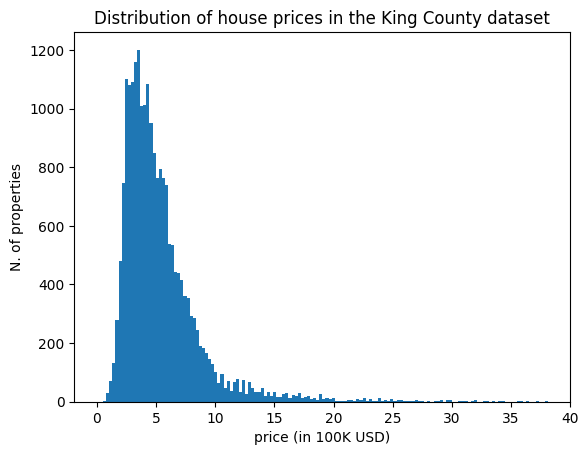

In [36]:
price_range = float(house_prices['price'].max() - house_prices['price'].min())/100000.
n_bins = int(math.sqrt(house_prices['price'].count()))

plt.hist(house_prices['price']/100000., bins = n_bins, range = (0, price_range/2))
plt.title('Distribution of house prices in the King County dataset')
plt.xlabel('price (in 100K USD)')
plt.ylabel('N. of properties')
plt.show()

Next, we check the seasonality of the house prices. In order to see any seasonal effect, we compute the mean of the house prices for every month.

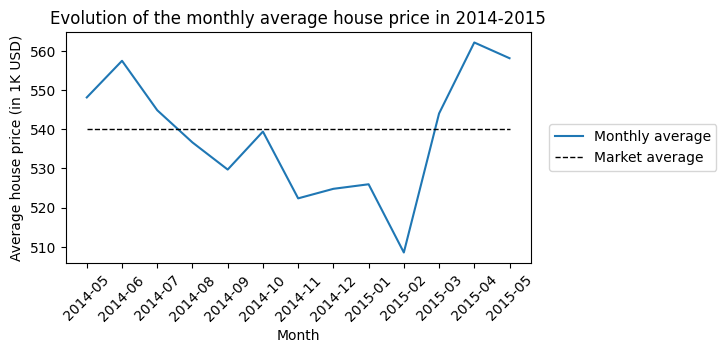

In [37]:
house_prices_season = house_prices[['sale_date', 'price']].copy() #we copy our df to a new variable so we don't spoil our df
house_prices_season['sale_date'] = house_prices_season['sale_date'].apply(lambda x: x.strftime('%Y-%m')) #we remove the day of all sale dates, leaving only YYYY-MM
house_prices_season = house_prices_season.groupby('sale_date', as_index = False).mean() #we group by YYYY-MM and use the mean as the aggretation function

plt.figure(figsize=(6, 3))
plt.plot(house_prices_season['sale_date'], house_prices_season['price']/1000., label = 'Monthly average')
plt.hlines(y = 540., xmin = house_prices_season['sale_date'].min(), xmax = house_prices_season['sale_date'].max(), colors='black', linestyles='--', lw=1, label = 'Market average')
plt.xticks(rotation = 45)
plt.xlabel('Month')
plt.ylabel('Average house price (in 1K USD)')
plt.title('Evolution of the monthly average house price in 2014-2015')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show()

#### 3.2.2 - Obtaining the profits and return rates

Our next task is to compute the profit made from the selling of a house. From the house price alone that is not possible, and we need compare the prices of the same house for at least two consecutive sales. The first step, then, is to find all properties that appear more than once in the dataset.

In [38]:
num_sale_transactions = house_prices[['id']].groupby('id', as_index = False).value_counts() #make a table with the house id's and the numer of sale transactions
id_list_two_or_more_transactions = num_sale_transactions[num_sale_transactions['count'] > 1]['id'].values.tolist() #make a list of those id's that appear more than once

The second step is to use the list of id's of houses that appear more than once in the dataset to screen our dataframe and reduce it to those records from which we can actually compute a profit from. To actually compute the profit we will order our screened dataframe by id and sale_date, in this order, descendingly and then make a copy. We will then shift the row keys by -1, i.e. shift the whole dataframe one row upwards. 

In [39]:
house_prices_screened = house_prices[house_prices['id'].isin(id_list_two_or_more_transactions)] #screen the sales records by the houses that appear more than once in the dataset
house_prices_screened = house_prices_screened.sort_values(by = ['id', 'sale_date'], ascending = False).reset_index(drop = True) #sort the resulting df by id and then by sale date and reset the index 

house_prices_screened_shifted = house_prices_screened.shift(-1, axis = 0) #creat a new dataset by shifting the original one one row upwards
house_prices_screened_shifted.iloc[-1] = house_prices_screened.iloc[0] #put periodic boundary conditions to avoid NaN in the last row
house_prices_screened_shifted['id'] = house_prices_screened_shifted['id'].apply(lambda x: int(x)) #put the id column back in the right format

In the third step we subtract the copy of the dataframe screened by the houses that appear more than once from its original to compute the profit made and the return time, i.e. the time it took to resell the property. We also compute the corresponding return rate, i.e. the profit as a fraction of the price the house was bought.

In [40]:
time_to_sale_and_profits = house_prices_screened[['id', 'sale_date', 'price']] - house_prices_screened_shifted[['id', 'sale_date', 'price']] #compute the profit from two consecutive sales transactions by taking the difference between non-shifted and shifted df's.
time_to_sale_and_profits = time_to_sale_and_profits.rename(columns = {'id' : 'id_diff', 'sale_date' : 'return_time', 'price' : 'profit'}) #rename some coluns for the sake of consistency
time_to_sale_and_profits['return_rate'] = house_prices_screened['price']/house_prices_screened_shifted['price'] - 1. #compute the return rate between two consecutive sale transactions
list_col_include = ['id', 'zipcode', 'yr_built', 'yr_renovated', 'renovation_flag', 'sale_date', 'price'] # listo of columns to be included
time_to_sale_and_profits = house_prices_screened[list_col_include].merge(time_to_sale_and_profits, left_index=True, right_index=True) #add the date the profit was made and house id
time_to_sale_and_profits = time_to_sale_and_profits[time_to_sale_and_profits['id_diff'] == 0].drop(['id_diff'], axis = 1) #remove all differences of prices computed for different houses and drop the id column
time_to_sale_and_profits

,id,zipcode,yr_built,yr_renovated,renovation_flag,sale_date,price,return_time,profit,return_rate
0,9834200885,98144,1962,0,False,2015-04-20,550000.0,277 days,190000.0,0.527778
2,9834200305,98144,1904,0,False,2015-02-10,615000.0,209 days,265000.0,0.757143
4,9828200460,98122,1922,0,False,2015-01-06,430000.0,193 days,170000.0,0.653846
6,9809000020,98004,1969,0,False,2015-03-13,1940000.0,304 days,40000.0,0.021053
8,9407110710,98045,1979,0,False,2015-02-26,322000.0,111 days,127000.0,0.651282
...,...,...,...,...,...,...,...,...,...,...
343,251300110,98003,1988,0,False,2015-01-14,358000.0,167 days,133000.0,0.591111
345,123039336,98106,1939,0,False,2014-12-08,244900.0,180 days,96900.0,0.654730
347,109200390,98023,1980,0,False,2014-10-20,250000.0,61 days,5000.0,0.020408
349,7200179,98055,1925,0,False,2015-04-24,175000.0,190 days,25000.0,0.166667


#### 3.2.3 - Profit, return rate and return time distributions

We can now make a statistical analysis of the profit, return time and return rate data.

In [41]:
time_to_sale_and_profits[['return_time', 'profit', 'return_rate']].describe().round(3)

,return_time,profit,return_rate
count,177,177.000,177.000
mean,182 days 07:11:11.186440678,135796.051,0.564
std,67 days 14:21:03.422354278,100596.854,0.467
min,61 days 00:00:00,-40000.000,-0.054
25%,126 days 00:00:00,65000.000,0.231
50%,177 days 00:00:00,115450.000,0.543
75%,233 days 00:00:00,199000.000,0.739
max,315 days 00:00:00,529950.000,3.218


We also check the distribution for the profit, return rate and return time.

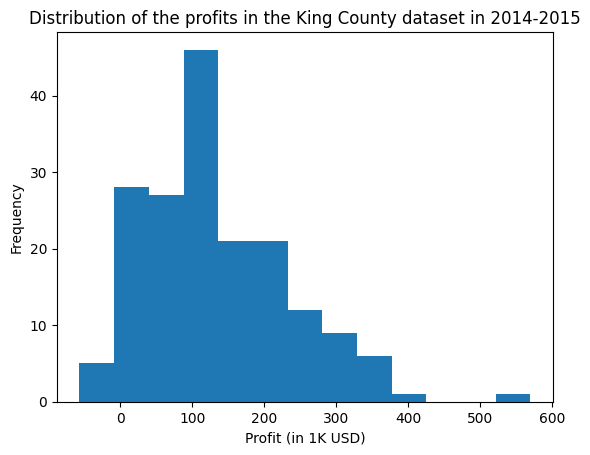

In [42]:
profit_range = float(time_to_sale_and_profits['profit'].max() - time_to_sale_and_profits['profit'].min())/1000.
n_bins = int(math.sqrt(time_to_sale_and_profits['profit'].count()))

plt.hist(time_to_sale_and_profits['profit']/1000., bins = n_bins, range = (-profit_range/10, profit_range))
plt.title('Distribution of the profits in the King County dataset in 2014-2015')
plt.xlabel('Profit (in 1K USD)')
plt.ylabel('Frequency')
plt.show()

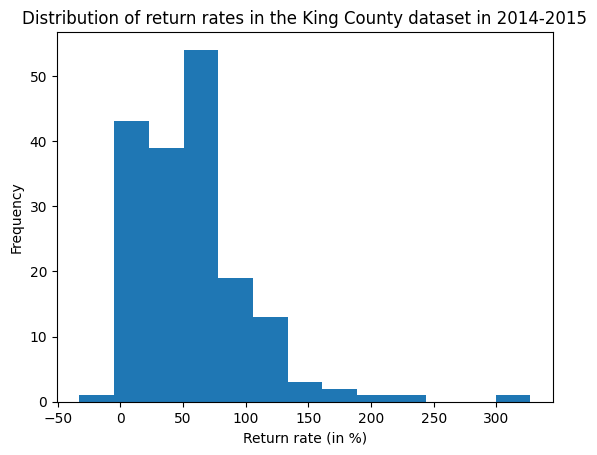

In [43]:
return_r_range = float(time_to_sale_and_profits['return_rate'].max() - time_to_sale_and_profits['return_rate'].min())*100.
n_bins = int(math.sqrt(time_to_sale_and_profits['return_rate'].count()))

plt.hist(time_to_sale_and_profits['return_rate']*100, bins = n_bins, range = (-return_r_range/10, return_r_range))
plt.title('Distribution of return rates in the King County dataset in 2014-2015')
plt.xlabel('Return rate (in %)')
plt.ylabel('Frequency')
plt.show()

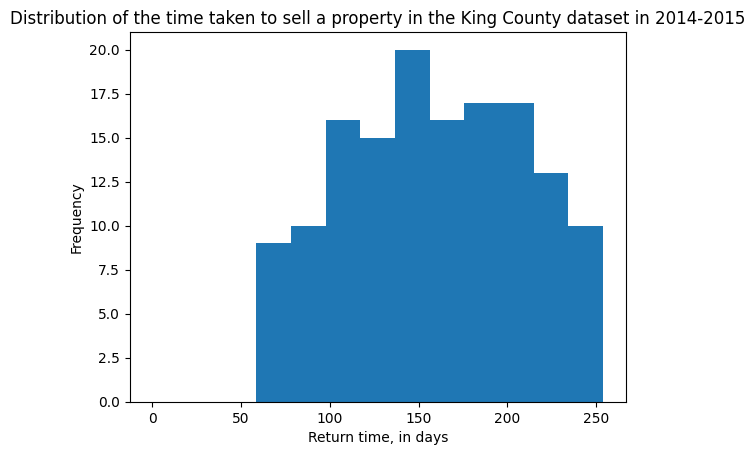

In [44]:
time_to_sell_range = time_to_sale_and_profits['return_time'].dt.days.max() - time_to_sale_and_profits['return_time'].dt.days.min()
n_bins = int(math.sqrt(time_to_sale_and_profits['return_time'].count()))

plt.hist(time_to_sale_and_profits['return_time'].dt.days, bins = n_bins, range = (0, time_to_sell_range))
plt.title('Distribution of the time taken to sell a property in the King County dataset in 2014-2015')
plt.xlabel('Return time, in days')
plt.ylabel('Frequency')
plt.show()

#### 3.2.4 - Conclusions on high profits

Since the profit, return rate and return time distributions are unimodal, the mean value of these distributions is a *bonafide* representative of the samples. Hence, we definie **high profit** as a return rate higher than the market's average return rate. In our case, this correponds to a return rate higher than 56%. 

Other interesting information we will use below are the return time and the seasonality. The average return time, i.e. the time it takes for a property to be sold again is 182 days. There is a distinctive seasonality in the house prices, as they seem to higher on spring and lower in winter.   

### 3.3 - What are the best neighbourhoods?

Here we are interested in the best neighbourhoods to invest in historic houses. By "best neighbourhoods" we mean neighbourhoods that yields high profits, regardless of other indicators. The neighbourhoods will be identified by their zipcode. We will answer the question of which are these neighbourhoods below.

## 4 - Research questions

We now have some question we would like to explore.

- Does the investiment in historic properties perform better or worse that the market average?
- Is the return time of historic properties higher or lower than the market average?
- Are the return rates for historic properties seasonal, i.e. do they depemd on the time of the year?
- Does renovated historic properties perform better or worse than non-renovated?
- Does the property's age influence in the profit?
- Which are the best neighbourhoods for investing in historic properties?

### 4.1 - Do historical houses perform better or worse than other properties as investments?

To answer this question we will narrow down the characteritics we need to look at.

In [45]:
hist_house_prices = kc_historic_houses_df[['id', 'zipcode', 'yr_built', 'yr_renovated', 'renovation_flag', 'sale_date', 'price']]
hist_house_prices['price'].describe().apply(lambda x: format(x,'f'))
hist_house_prices

,id,zipcode,yr_built,yr_renovated,renovation_flag,sale_date,price
0,7129300520,98178,1955,0,False,2014-10-13,221900.0
1,6414100192,98125,1951,1991,True,2014-12-09,538000.0
2,5631500400,98028,1933,0,False,2015-02-25,180000.0
3,2487200875,98136,1965,0,False,2014-12-09,604000.0
7,2008000270,98198,1963,0,False,2015-01-15,291850.0
...,...,...,...,...,...,...,...
21287,522059130,98058,1959,0,False,2015-04-29,465000.0
21316,9266700190,98103,1920,0,False,2015-05-11,245000.0
21327,2924079034,98024,1953,0,False,2014-09-25,332220.0
21454,121039156,98023,1943,0,False,2015-01-09,249000.0


We now take a look at the distribution of historic houses prices.

In [46]:
hist_house_prices.describe()

,id,zipcode,yr_built,yr_renovated,sale_date,price
count,8.783000e+03,8783.000000,8783.000000,8783.000000,8783,8.783000e+03
mean,4.460382e+09,98104.613799,1941.305932,147.401344,2014-10-29 17:44:23.008083968,5.158062e+05
min,1.200019e+06,98001.000000,1900.000000,0.000000,2014-05-02 00:00:00,7.800000e+04
25%,2.026049e+09,98058.000000,1926.000000,0.000000,2014-07-22 00:00:00,3.000000e+05
50%,3.931900e+09,98116.000000,1947.000000,0.000000,2014-10-17 00:00:00,4.350000e+05
75%,7.130800e+09,98136.000000,1956.000000,0.000000,2015-02-17 00:00:00,6.230000e+05
max,9.900000e+09,98199.000000,1965.000000,2015.000000,2015-05-27 00:00:00,7.700000e+06
std,2.823820e+09,54.207037,18.203895,521.880690,NaN,3.550102e+05


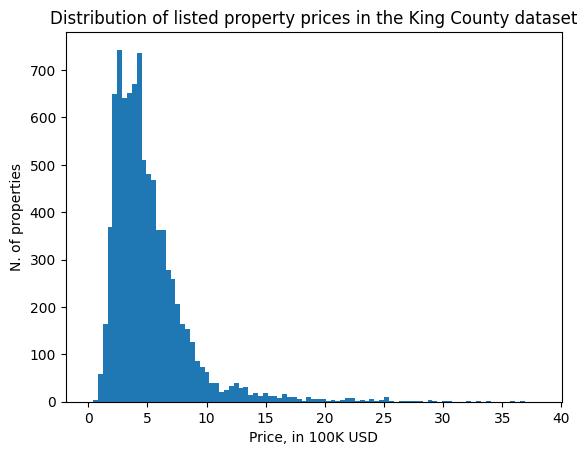

In [47]:
price_range_hist = float(hist_house_prices['price'].max() - hist_house_prices['price'].min())/100000.
n_bins = int(math.sqrt(hist_house_prices['price'].count()))

plt.hist(hist_house_prices['price']/100000., bins = n_bins, range = (0, price_range_hist/2))
plt.title('Distribution of listed property prices in the King County dataset')
plt.xlabel('Price, in 100K USD')
plt.ylabel('N. of properties')
plt.show()

Historic properties are slightly cheaper than the average market price, as the mean price for this kind of property is around 5.4% less than the market average. 

In [130]:
hist_house_prices_screened = hist_house_prices[hist_house_prices['id'].isin(id_list_two_or_more_transactions)] #screen the sales records by the houses that appear more than once in the dataset
hist_house_prices_screened = hist_house_prices_screened.sort_values(by = ['id', 'sale_date'], ascending = False).reset_index(drop = True) #sort the resulting df by id and then by sale date and reset the index

hist_house_prices_screened_shifted = hist_house_prices_screened.shift(-1, axis = 0) #creat a new dataset by shifting the original one one row upwards
hist_house_prices_screened_shifted.iloc[-1] = hist_house_prices_screened.iloc[0] #put periodic boundary conditions to avoid NaN in the last row


time_to_sale_and_profits_hist = hist_house_prices_screened[['id', 'sale_date', 'price']] - hist_house_prices_screened_shifted[['id', 'sale_date', 'price']] #compute the profit from two consecutive sales transactions by taking the difference between non-shifted and shifted df's.
time_to_sale_and_profits_hist = time_to_sale_and_profits_hist.rename(columns = {'id' : 'id_diff', 'sale_date' : 'return_time', 'price' : 'profit'}) #rename some coluns for the sake of consistency
time_to_sale_and_profits_hist['return_rate'] = hist_house_prices_screened['price']/hist_house_prices_screened_shifted['price'] - 1. #compute the return rate between two consecutive sale transactions
list_col_include = ['id', 'zipcode', 'yr_built', 'yr_renovated', 'renovation_flag', 'sale_date', 'price'] # listo of columns to be included
time_to_sale_and_profits_hist = hist_house_prices_screened[list_col_include].merge(time_to_sale_and_profits_hist, left_index=True, right_index=True) #add columns in list_col_include
time_to_sale_and_profits_hist = time_to_sale_and_profits_hist[time_to_sale_and_profits_hist['id_diff'] == 0.].drop(['id_diff'], axis = 1) #remove all differences of prices computed for different houses and drop the id column
time_to_sale_and_profits_hist[['return_time', 'profit', 'return_rate']].describe()

,return_time,profit,return_rate
count,105,105.000000,105.000000
mean,186 days 16:00:00,157130.076190,0.683686
std,64 days 23:00:54.265292502,104129.715593,0.504802
min,62 days 00:00:00,-20050.000000,-0.039314
25%,143 days 00:00:00,87597.000000,0.382353
50%,183 days 00:00:00,134000.000000,0.593023
75%,236 days 00:00:00,220000.000000,0.806452
max,314 days 00:00:00,529950.000000,3.218009


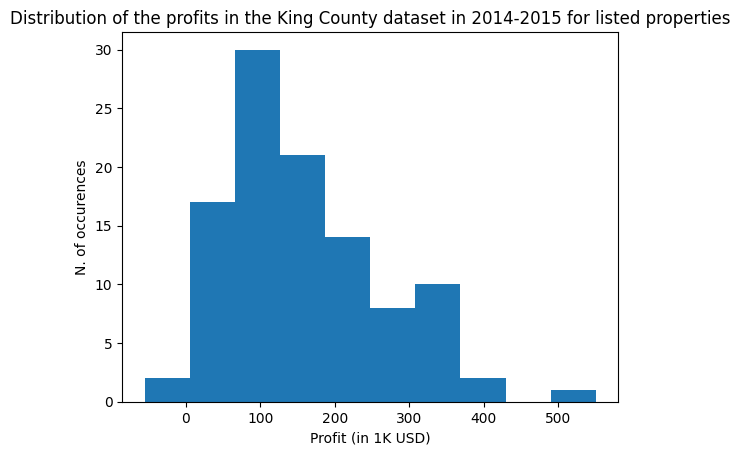

In [49]:
profit_range_hist = float(time_to_sale_and_profits_hist['profit'].max() - time_to_sale_and_profits_hist['profit'].min())/1000.
n_bins = int(math.sqrt(time_to_sale_and_profits_hist['profit'].count()))

plt.hist(time_to_sale_and_profits_hist['profit']/1000., bins = n_bins, range = (-profit_range_hist/10, profit_range_hist))
plt.title('Distribution of the profits in the King County dataset in 2014-2015 for listed properties')
plt.xlabel('Profit (in 1K USD)')
plt.ylabel('N. of occurences')
plt.show()

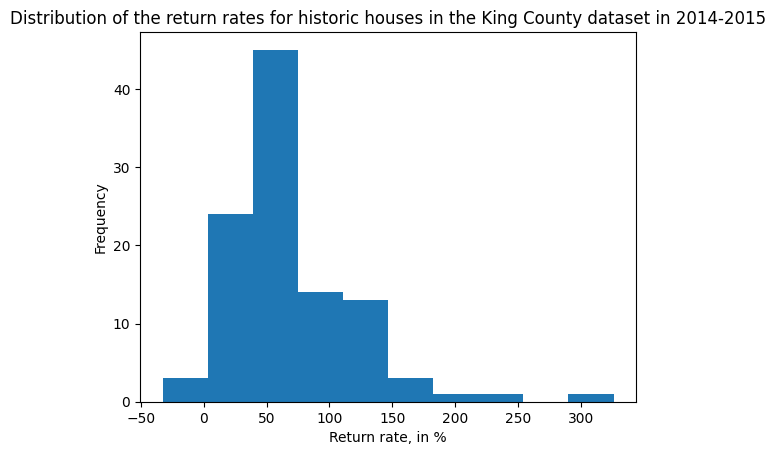

In [131]:
return_r_range = float(time_to_sale_and_profits_hist['return_rate'].max() - time_to_sale_and_profits_hist['return_rate'].min())*100.
n_bins = int(math.sqrt(time_to_sale_and_profits_hist['return_rate'].count()))

plt.hist(time_to_sale_and_profits_hist['return_rate']*100, bins = n_bins, range = (-return_r_range/10, return_r_range))
plt.title('Distribution of the return rates for historic houses in the King County dataset in 2014-2015')
plt.xlabel('Return rate, in %')
plt.ylabel('Frequency')
plt.show()

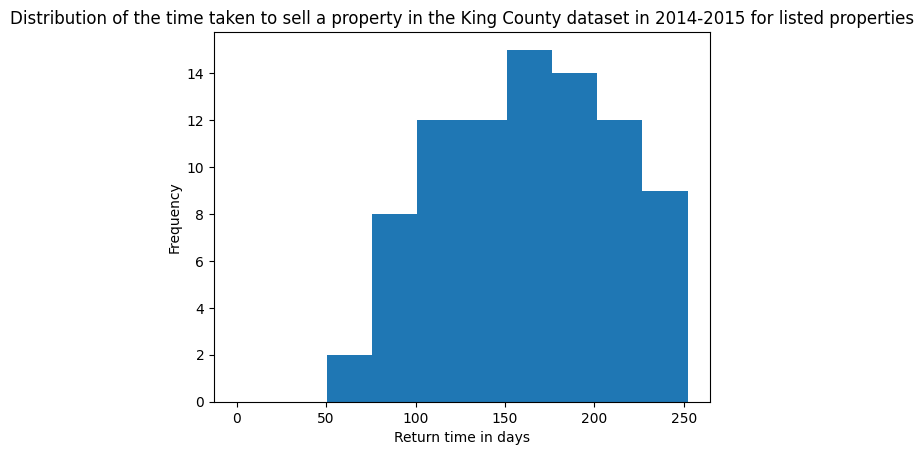

In [51]:
time_to_sell_range_hist = time_to_sale_and_profits_hist['return_time'].dt.days.max() - time_to_sale_and_profits_hist['return_time'].dt.days.min()
n_bins = int(math.sqrt(time_to_sale_and_profits_hist['return_time'].count()))

plt.hist(time_to_sale_and_profits_hist['return_time'].dt.days, bins = n_bins, range = (0, time_to_sell_range_hist))
plt.title('Distribution of the time taken to sell a property in the King County dataset in 2014-2015 for listed properties')
plt.xlabel('Return time in days')
plt.ylabel('Frequency')
plt.show()

The historic properties clearly outperformed as investiments in King County's market with respect to the market average. While the average return rate is 56%, for historic properties the average return is 68%. Moreover, the average return time for historic properties is 186 days, which is only marginally longer than market average and falls within the standard deviation.   

### 4.2 - Is the investment in historic properties seasonal?

Here we explore whether or not the profits in the historic house market depends on the time of the year. 

In order to check this, we again will put the sale dates in the format YYYY-MM and then group by YYYY-MM and use the mean on price as the aggregation function. 

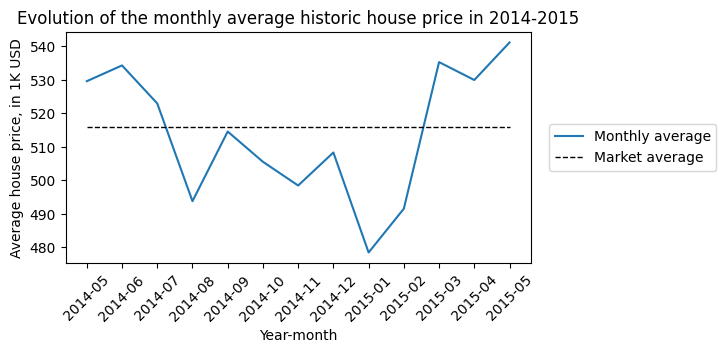

In [132]:
hist_house_prices_season = hist_house_prices[['sale_date', 'price']].copy()
hist_house_prices_season['sale_date'] = hist_house_prices_season['sale_date'].apply(lambda x: x.strftime('%Y-%m'))
hist_house_prices_season = hist_house_prices_season.groupby('sale_date', as_index = False).mean()

plt.figure(figsize=(6, 3))
plt.plot(hist_house_prices_season['sale_date'], hist_house_prices_season['price']/1000., label = 'Monthly average')
plt.hlines(y = 516., xmin = house_prices_season['sale_date'].min(), xmax = house_prices_season['sale_date'].max(), colors='black', linestyles='--', lw=1, label = 'Market average')
plt.xticks(rotation = 45)
plt.xlabel('Year-month')
plt.ylabel('Average house price, in 1K USD')
plt.title('Evolution of the monthly average historic house price in 2014-2015')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show()

Hence, the historic house prices are also seasonal, with prices lower in autum/winter and higher in spring. A way to maximise profits would be to buy the property in winter and resell it in spring.

### 4.3 - Does renovated historic properties perform better or worse than non-renovated ones?

Here we analyse whether is better to invest in renovated rather than non-renovated histroci properties. Hence, we first compute the mean profit, return time and return rate for each case. The result is the followin.

In [53]:
hist_renovated_mean_profit = time_to_sale_and_profits_hist[['renovation_flag','return_time', 'profit', 'return_rate']].groupby('renovation_flag', as_index = False)
hist_renovated_mean_profit = hist_renovated_mean_profit.agg(count = ('renovation_flag', 'size'), mean_return_time = ('return_time', 'mean'), mean_profit = ('profit', 'mean'), mean_return_rate = ('return_rate', 'mean'))
hist_renovated_mean_profit

,renovation_flag,count,mean_return_time,mean_profit,mean_return_rate
0,False,101,187 days 17:06:32.079207920,159753.049505,0.700917
1,True,4,160 days 06:00:00,90900.000000,0.248587


It is interesting to plot the result for the mean return rate, see below.

Text(0.5, 1.0, 'Average return rate for renovated and non-renovated historic houses')

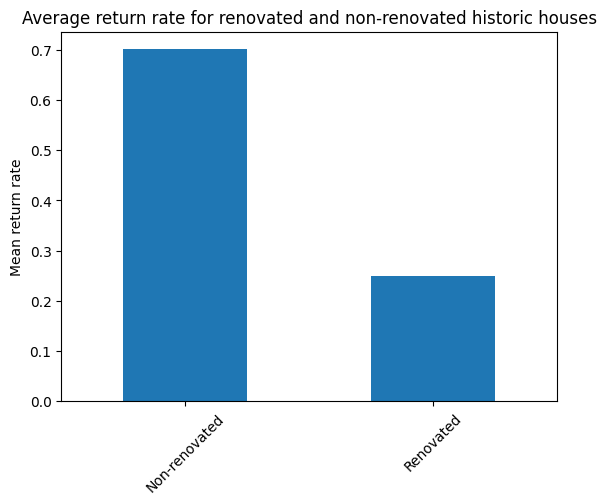

In [54]:
ax = hist_renovated_mean_profit[['renovation_flag', 'mean_return_rate']].plot.bar(legend = False)
ax.set_xticklabels(['Non-renovated', 'Renovated'], rotation = 45)
ax.set_ylabel('Mean return rate')
ax.set_title('Average return rate for renovated and non-renovated historic houses')

As comparison, we perform the same analysis for the whole market.

In [55]:
renovated_mean_profit = time_to_sale_and_profits[['renovation_flag','return_time', 'profit', 'return_rate']].groupby('renovation_flag', as_index = False)
renovated_mean_profit = renovated_mean_profit.agg(count = ('renovation_flag', 'size'), mean_return_time = ('return_time', 'mean'), mean_profit = ('profit', 'mean'), mean_return_rate = ('return_rate', 'mean'))
renovated_mean_profit

,renovation_flag,count,mean_return_time,mean_profit,mean_return_rate
0,False,173,182 days 19:25:19.075144508,136834.109827,0.571671
1,True,4,160 days 06:00:00,90900.000000,0.248587


And again plot the mean return rate for each case.

Text(0.5, 1.0, 'Average return rate for renovated and non-renovated houses')

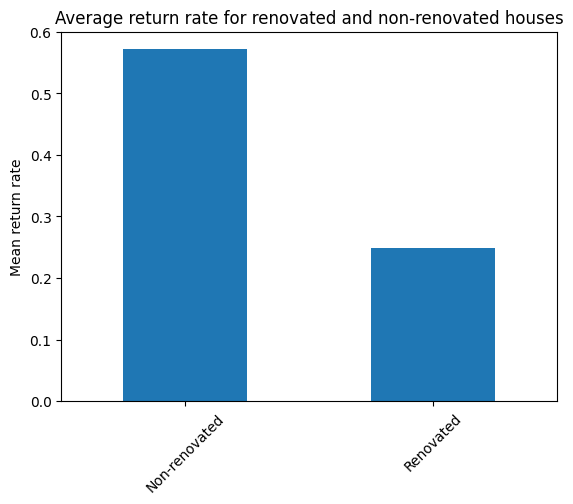

In [56]:
ax = renovated_mean_profit[['renovation_flag', 'mean_return_rate']].plot.bar(legend = False)
ax.set_xticklabels(['Non-renovated', 'Renovated'], rotation = 45)
ax.set_ylabel('Mean return rate')
ax.set_title('Average return rate for renovated and non-renovated houses')

Clearly, non-renovated historic properties perform well as investiments and again outperfom the market. The data, however is too unbalanced in favour of non-renovated properties. Hence, it does not rule out the possibility that renovating the property would increase its return rate. In any case, non-renovated properties seem a good investiment.

### 4.4 - Does the property's age influence the profit?

Here we analyse whether the ge of the house or the decade it was built influences the profit. In order to do that we will aggregate the return rate according to the decade the house was built and take its average.

In [57]:
house_age_per_decade = time_to_sale_and_profits_hist[['yr_built', 'profit', 'return_rate']].copy()
house_age_per_decade[['yr_built']] = house_age_per_decade[['yr_built']].apply(lambda x : (x//10)*10, axis = 0)
house_age_per_decade  = house_age_per_decade.groupby('yr_built', as_index = False).agg(count = ('yr_built', 'size'), mean_profit = ('profit', 'mean'), mean_return_rate = ('return_rate', 'mean'))
house_age_per_decade

,yr_built,count,mean_profit,mean_return_rate
0,1900,4,231000.000000,0.893675
1,1910,7,233214.285714,0.945459
2,1920,13,146915.384615,0.508645
3,1930,10,172150.000000,0.973102
4,1940,24,155865.041667,0.670049
5,1950,32,141564.062500,0.593914
6,1960,15,135996.466667,0.677619


We now make a barplot of the mean return rate distributed according the decade the property was built.

Text(0.5, 1.0, 'Average return rate for histroic houses built in various decades in 2014-2015')

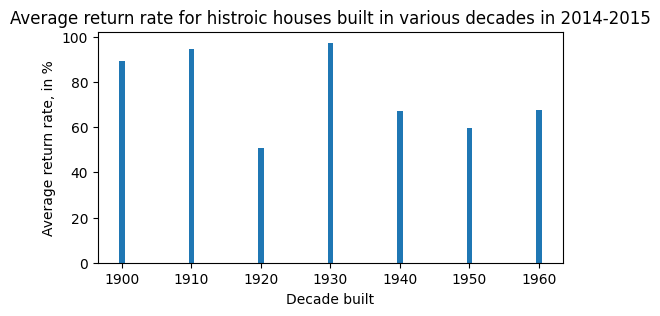

In [58]:
plt.figure(figsize=(6, 3))
plt.bar(house_age_per_decade['yr_built'], house_age_per_decade['mean_return_rate']*100)
plt.xlabel('Decade built')
plt.ylabel('Average return rate, in %')
plt.title('Average return rate for histroic houses built in various decades in 2014-2015')

Text(0.5, 1.0, 'Average profit for histroic houses built in various decades in 2014-2015')

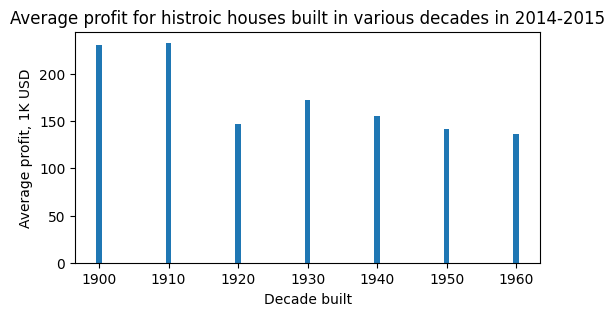

In [59]:
plt.figure(figsize=(6, 3))
plt.bar(house_age_per_decade['yr_built'], house_age_per_decade['mean_profit']/1000.)
plt.xlabel('Decade built')
plt.ylabel('Average profit, 1K USD')
plt.title('Average profit for histroic houses built in various decades in 2014-2015')

There seems to be no clear trend in the return rates according to the age of the property, in absolute values the yearnings tend to higher for older builings. 

### 4.5 - What are the best neightbourhoods for high profits?

Finally, we analyse the neighbourhoods in terms of the return rates. Here we simply compute the average return time, profit and return rate for each zipcodes in our dataframe for historic houses and screen the result using our high profit criteria. The top 10 best neighbourhoods to invest, according our criteria, are given below. 

In [60]:
zipcode_averages = time_to_sale_and_profits_hist.drop(['id', 'yr_renovated'], axis = 1).groupby('zipcode', as_index = False)
zipcode_averages = zipcode_averages.agg(count = ('zipcode', 'size'), mean_yr_built = ('yr_built', 'mean'), mean_return_time = ('return_time', 'mean'), mean_profit = ('profit', 'mean'), mean_return_rate = ('return_rate', 'mean')).round(2)
zipcode_averages.sort_values('mean_return_rate', ascending = False, ignore_index = True, inplace = True)
zipcode_averages['mean_yr_built'] = zipcode_averages['mean_yr_built'].astype('int64')
zipcode_averages_high_profit = zipcode_averages[zipcode_averages['mean_return_rate'] > 0.56]
zipcode_averages_high_profit.head(10)

,zipcode,count,mean_yr_built,mean_return_time,mean_profit,mean_return_rate
0,98148,1,1932,243 days 00:00:00,339500.00,3.22
1,98032,1,1939,106 days 00:00:00,150000.00,1.76
2,98116,1,1912,258 days 00:00:00,257500.00,1.28
3,98118,8,1924,192 days 12:00:00,239750.00,1.15
4,98126,2,1918,146 days 12:00:00,244500.00,1.01
5,98023,3,1960,176 days 08:00:00,96515.67,0.96
6,98117,5,1931,206 days 19:12:00,317010.00,0.84
7,98106,4,1941,233 days 00:00:00,164710.00,0.82
8,98178,3,1943,218 days 00:00:00,99966.67,0.82
9,98166,4,1951,286 days 12:00:00,144193.75,0.73


We now make a geographic plot using the zipcodes of the top 10 highest profits, with a heatmap to depict the return rates.

In [128]:
import plotly.express as px

df = zipcode_averages_high_profit.head(10).copy()
df['mean_return_rate'] = df['mean_return_rate']*100. 
geojson_data = 'https://gis-kingcounty.opendata.arcgis.com/datasets/kingcounty::zipcodes-for-king-county-and-surrounding-area-zipcode-area.geojson'

fig = px.choropleth_mapbox(df, #dataset with the zipcode and return rates 
                           geojson=geojson_data, #
                           color="mean_return_rate",
                           locations="zipcode", 
                           featureidkey="properties.ZIPCODE",
                           center={"lat": 47.47, "lon": -122.5},
                           mapbox_style="carto-positron", 
                           zoom=8.5,
                           title = 'Top 10 neighbourhoods with high profit',
                           labels={'mean_return_rate': 'Average return rate, in %', 'zipcode' : 'Zipcode'},
                          width = 800,
                          height = 600)
#fig.update_layout(margin={"r":500,"t":50,"l":100,"b":0})
fig.show()